In [2]:
# Import libraries necessary for this project
import missingno as msno
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy.stats import norm, skew 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns',100)
pd.set_option('max_rows',100)

# 데이터 숫자 소숫점 표시
pd.options.display.float_format = '{:.2f}'.format 

#### 데이터 불러오기

In [218]:
# read_csv
raw_data = pd.read_csv('vehicles.csv')

In [219]:
raw_data.shape

(509577, 25)

####  데이터 파악하기 : 각 컬럼 정보 확인 : 총 25개

1. id : entry : 중고차 등록 아이디 # 사용안함
2. url : listing : 중고차 등록 URL # 사용안함
3. region : craigslist region : 중고차 지역 # 카테고리 독립변수 charater 1
4. region_url : region URL : 중고차 지역 URL # 사용안함
5. price : entry price : 중고차 가격 # 종속변수 1
6. year : entry year : 중고차 등록 연도 # 실수형 독립변수 numeric 1
7. manufacturer : manufacturer of vehicle : 제조사 # 카테고리 독립변수 charater 2
8. model : model of vehicle : 차량 모델명 # 사용안함
9. condition : condition of vehicle : 차량 상태 # 카테고리 독립변수 charater 4
10. cylinders : number of cylinders : 엔진 기통수 # 카테고리 독립변수 charater 5
11. fuel : fuel type 연료타입 # 카테고리 독립변수 charater 6
12. odometer : miles traveled by vehicle 총주행거리 # 실수형 독립변수 numeric 2
13. title_status : title status of vehicle 차량 상태 # 카테고리 독립변수 charater 7
14. transmission : transmission of vehicle 미션 # 카테고리 독립변수 character 8
15. vin : vehicle identification number 차대번호 # 사용안함
16. drive : type of drive 4wd: 33%, 2wd(fwd,rwd): 38%, null: 28% : 구동방식 # 카테고리 독립변수 character 9
17. size : size of vehicle, null: 67%, full-size: 18%, other: 15% : 차량크기 # 카테고리 독립변수 character 10
18. type : generic type of vehicle 차량 타입 # 카테고리 독립변수 character 11
19. paint_color : color of vehicle, null: 32%, white: 18%, other: 50% : 차량 색상 # 카테고리 독립변수 character 12
20. image_url : image URL, 349468 unique values : 중고차 사진 URL # 사용안함
21. description : listed description of vehicle : 중고차 상태 설명 # 사용안함
22. county : useless column left in by mistake : 실수로 올린 필요없는 컬럼 # 사용안함
23. state : state of listing : 주 명 # 카테고리 독립변수 character 13
24. lat : latitude of listing : 위도 numeric
25. long : longitude of listing : 경도 numeric

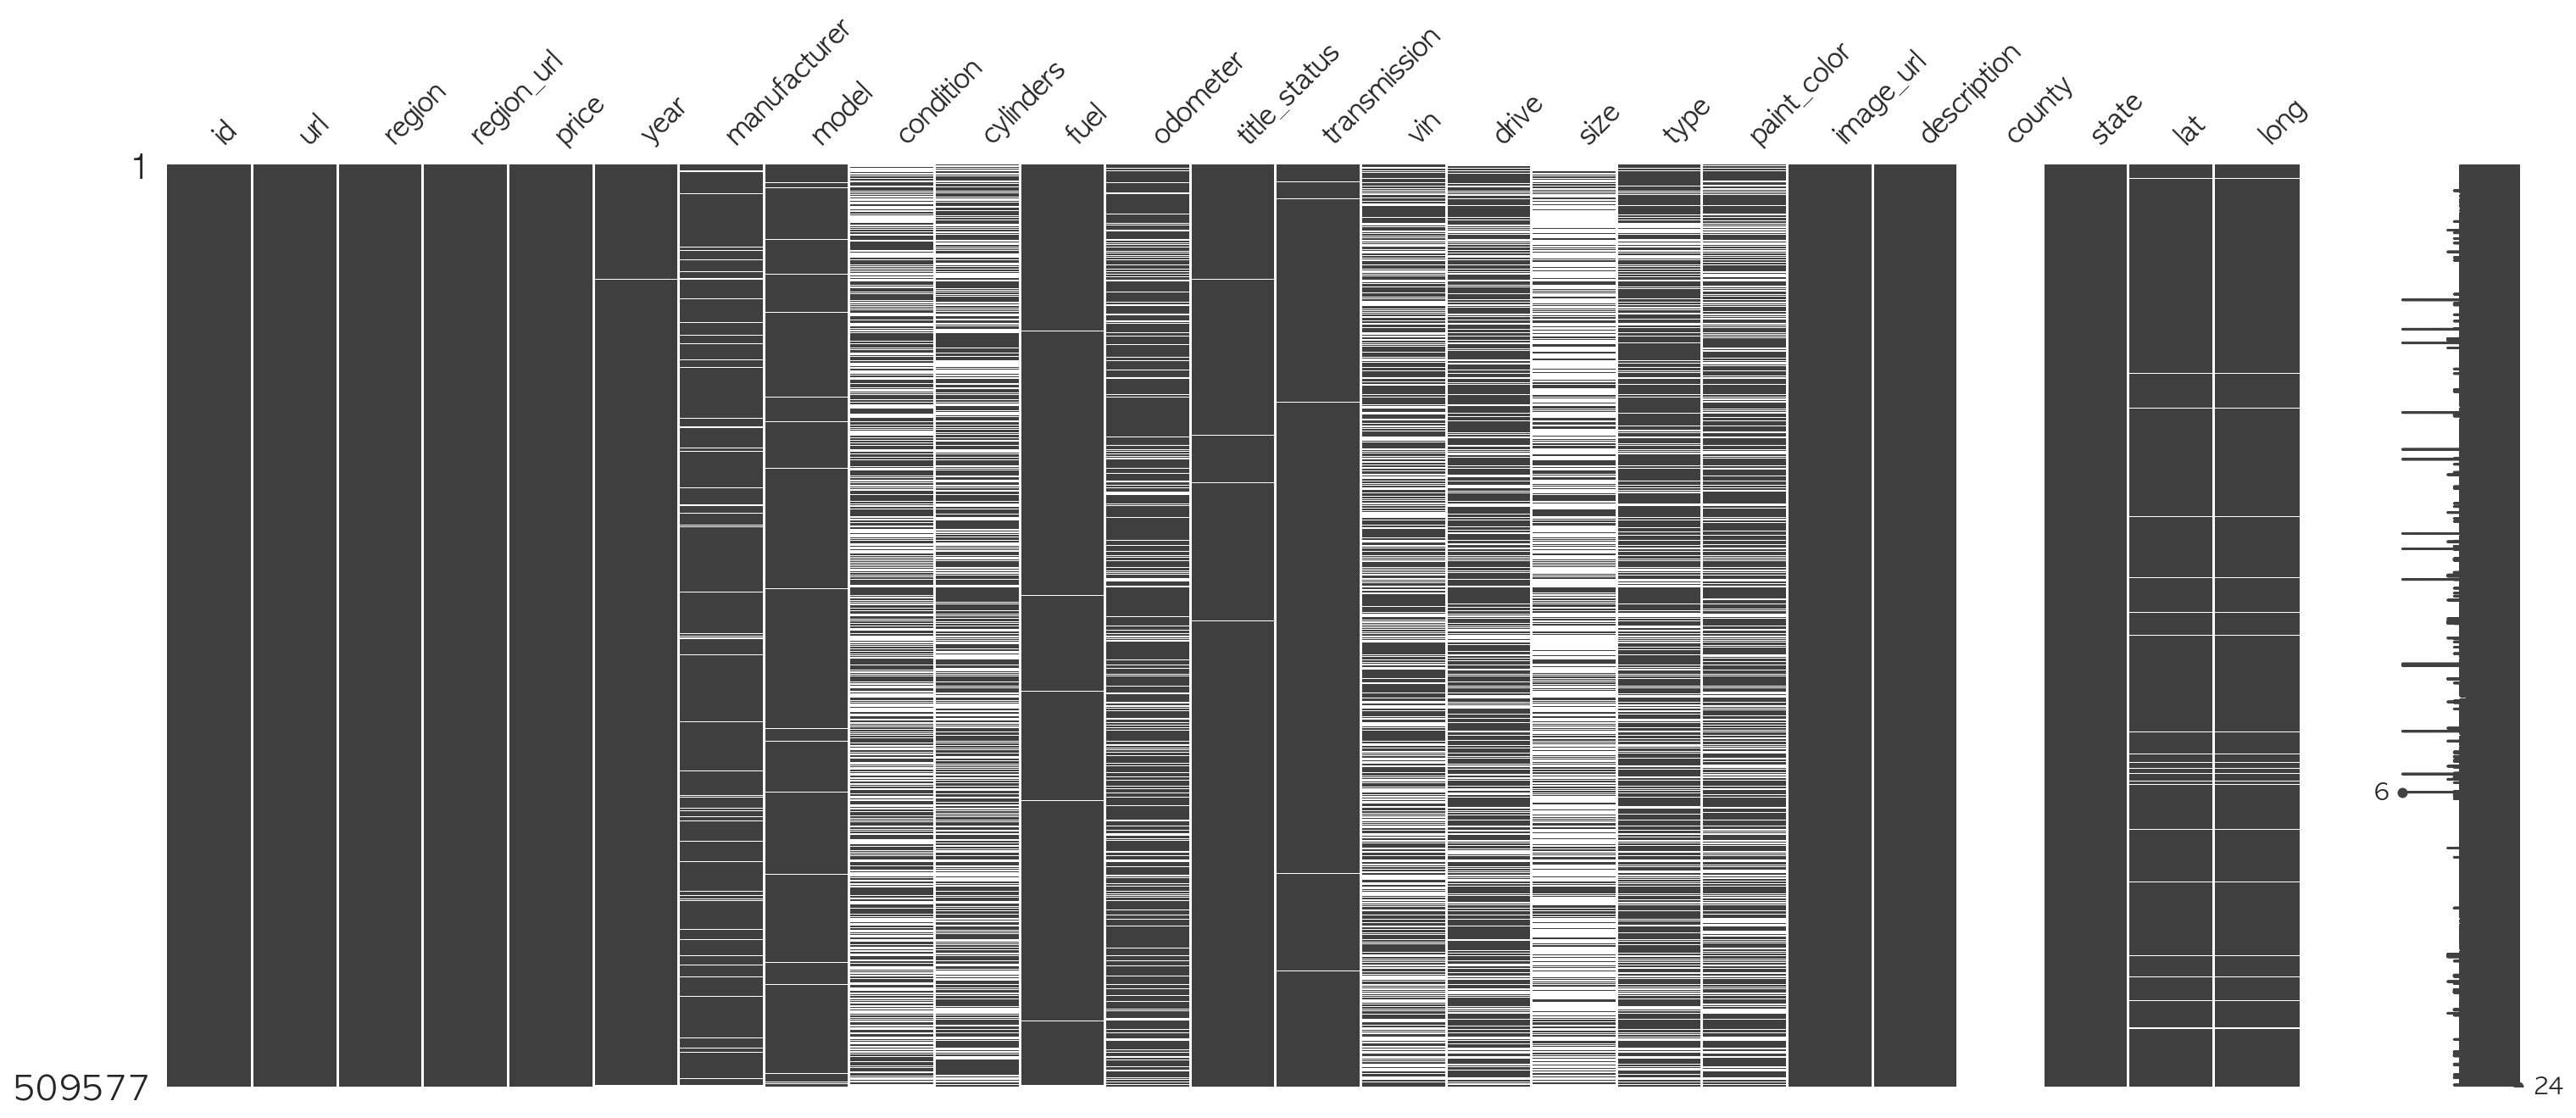

In [158]:
# 결측치 확인
msno.matrix(raw_data)
plt.show()

#### 데이터 컬럼 분류 : 사용유무

 - id : entry : 중고차 등록 아이디 # 구분자, 실제 모델링에는 사용안함

1. 분석대상항목(총 12개)

1.1 카테고리 항목 : 9개
 - manufacturer : manufacturer of vehicle : 제조사 # 카테고리 독립변수 charater 1
 - cylinders : number of cylinders : 엔진 기통수 # 카테고리 독립변수 charater 2
 - fuel : fuel type 연료타입 # 카테고리 독립변수 charater 3
 - title_status : title status of vehicle 차량 상태 # 카테고리 독립변수 charater 4
 - transmission : transmission of vehicle 미션 # 카테고리 독립변수 character 5
 - drive : type of drive 4wd: 33%, 2wd(fwd,rwd): 38%, null: 28% : 구동방식 # 카테고리 독립변수 character 6
 - type : generic type of vehicle 차량 타입 # 카테고리 독립변수 character 7
 - paint_color : color of vehicle, null: 32%, white: 18%, other: 50% : 차량 색상 # 카테고리 독립변수 character 8
 - state : state of listing : 주 명 # 카테고리 독립변수 character 9
 
1.2 실수 항목 : 총 3개
 - price : entry price : 중고차 가격 # 종속변수 1
 - year : entry year : 중고차 등록 연도 # 실수형 독립변수 numeric 1
 - odometer : miles traveled by vehicle 총주행거리 # 실수형 독립변수 numeric 2


2. 제외항목 : 총 12개

 - url : listing : 중고차 등록 URL # 사용안함 1
 - region : craigslist region : 중고차 지역 # 사용안함 charater 2
 - region_url : region URL : 중고차 지역 URL # 사용안함 3
 - model : model of vehicle : 차량 모델명 # 사용안함 4
 - condition : condition of vehicle : 차량 상태 # 사용안함 charater 5
 - size : size of vehicle, null: 67%, full-size: 18%, other: 15% : 차량크기 # 사용안함 character 6
 - vin : vehicle identification number 차대번호 # 사용안함 7
 - image_url : image URL, 349468 unique values : 중고차 사진 URL # 사용안함 8
 - description : listed description of vehicle : 중고차 상태 설명 # 사용안함 9
 - county : useless column left in by mistake : 실수로 올린 필요없는 컬럼 # 사용안함 10
 - lat : latitude of listing : 위도 numeric 11
 - long : longitude of listing : 경도 numeric 12

#### 제외항목 및 결측 행 제거

In [220]:
# 제외 항목 제거
raw_data.drop(['url', 'region', 'region_url', 'model', 'condition', 'vin', 'size', 
               'image_url', 'description', 'county', 'lat', 'long'], axis=1, inplace=True)
# 결측 행 제거
raw_data = raw_data.dropna(axis=0)

In [221]:
raw_data.shape

(188117, 13)

#### 종속변수 price & 실수형 독립변수 year, odometer 정리

In [222]:
# price : 0, $100 이하, $100만 이상 제거
raw_data = raw_data[(raw_data['price'] > 100) & (raw_data['price'] <= 1000000)]

# price : 1 ~ 9까지 중복된 숫자 제거
price_duple = raw_data[raw_data['price']
                       .isin([1, 11, 111, 1111, 11111, 111111, 1111111, 11111111, 111111111, 
                              2, 22, 222, 2222, 22222, 222222, 2222222, 22222222, 222222222, 
                              3, 33, 333, 3333, 33333, 333333, 3333333, 33333333, 333333333, 
                              4, 44, 444, 4444, 44444, 444444, 4444444, 44444444, 444444444, 
                              5, 55, 555, 5555, 55555, 555555, 5555555, 55555555, 555555555, 
                              6, 66, 666, 6666, 66666, 666666, 6666666, 66666666, 666666666, 
                              7, 77, 777, 7777, 77777, 777777, 7777777, 77777777, 777777777, 
                              8, 88, 888, 8888, 88888, 888888, 8888888, 88888888, 888888888, 
                              9, 99, 999, 9999, 99999, 999999, 9999999, 99999999, 999999999])].index
raw_data.drop(price_duple, inplace=True)

# price : 1 ~ 9까지 연속된 숫자 제거
price_iter = raw_data[raw_data['price']
                      .isin([12, 123, 1234, 12345, 123456, 1234567, 12345678, 123456789,  
                             23, 234, 2345, 23456, 234567, 2345678, 23456789, 
                             34, 345, 3456, 34567, 345678, 3456789, 
                             45, 456, 4567, 45678, 456789, 
                             56, 567, 5678, 56789, 
                             67, 678, 6789, 
                             78, 789, 
                             89, 
                             90,
                             98, 987, 9876, 98765, 987654, 9876543, 98765432, 987654321, 
                             87, 876, 8765, 87654, 876543, 8765432, 87654321, 
                             76, 765, 7654, 76543, 765432, 7654321, 
                             65, 654, 6543, 65432, 654321, 
                             54, 543, 5432, 54321, 
                             43, 432, 4321, 
                             32, 321, 
                             21])].index
raw_data.drop(price_iter, inplace=True)

# year : 0값, 2020년, 2021년 데이터 제거
raw_data = raw_data[(raw_data['year'] != 0) & (raw_data['year'] != 2020) & (raw_data['year'] != 2021)]


# odometer : 0값, 100이하, 100만 마일 이상 데이터 제거
raw_data = raw_data[(raw_data['odometer'] != 0) & (raw_data['odometer'] >= 100) & (raw_data['odometer'] <= 1000000)]



In [223]:
# 주행거리 데이터 삭제 후 수량 : 169914 개
len(raw_data)

169914

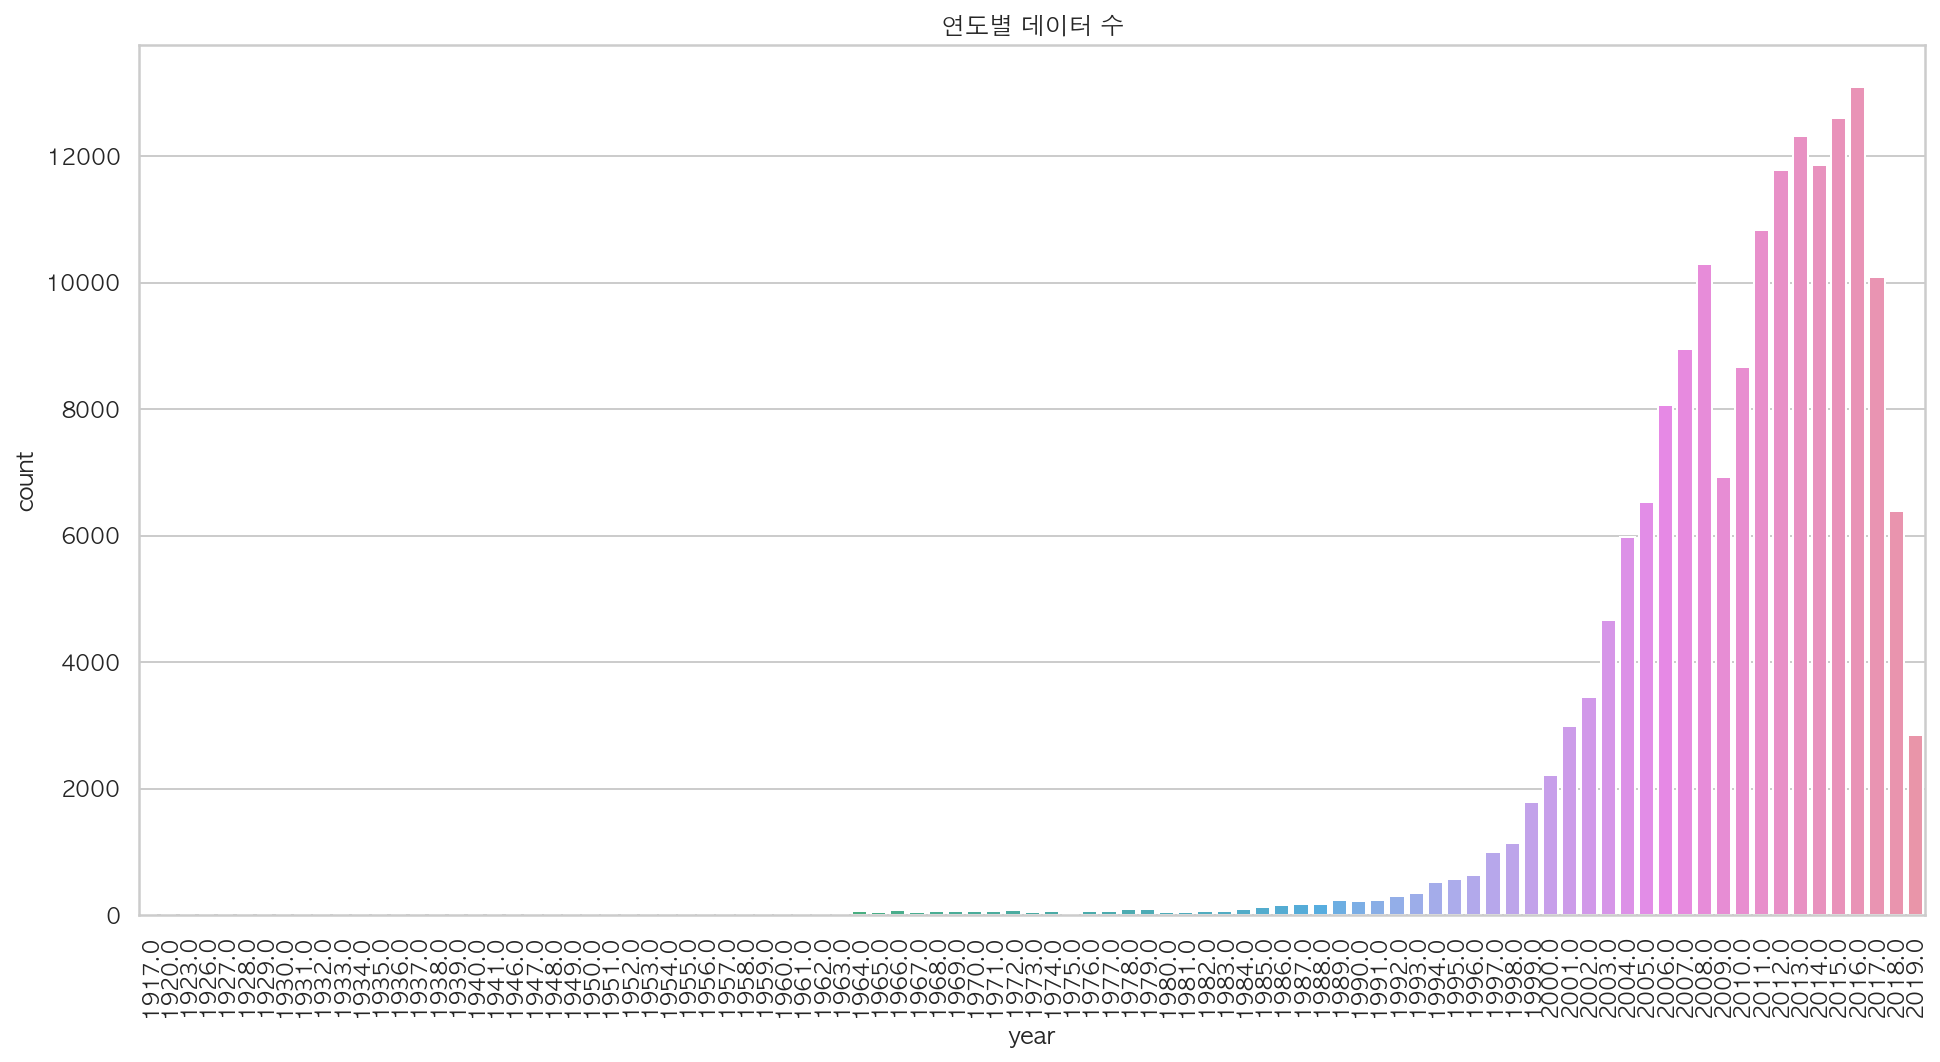

In [225]:
# year 데이터 그래프
plt.figure(figsize=(16,8))
ax = sns.countplot(x='year', data=raw_data)
plt.title('연도별 데이터 수')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
# plt.tight_layout()
plt.show()

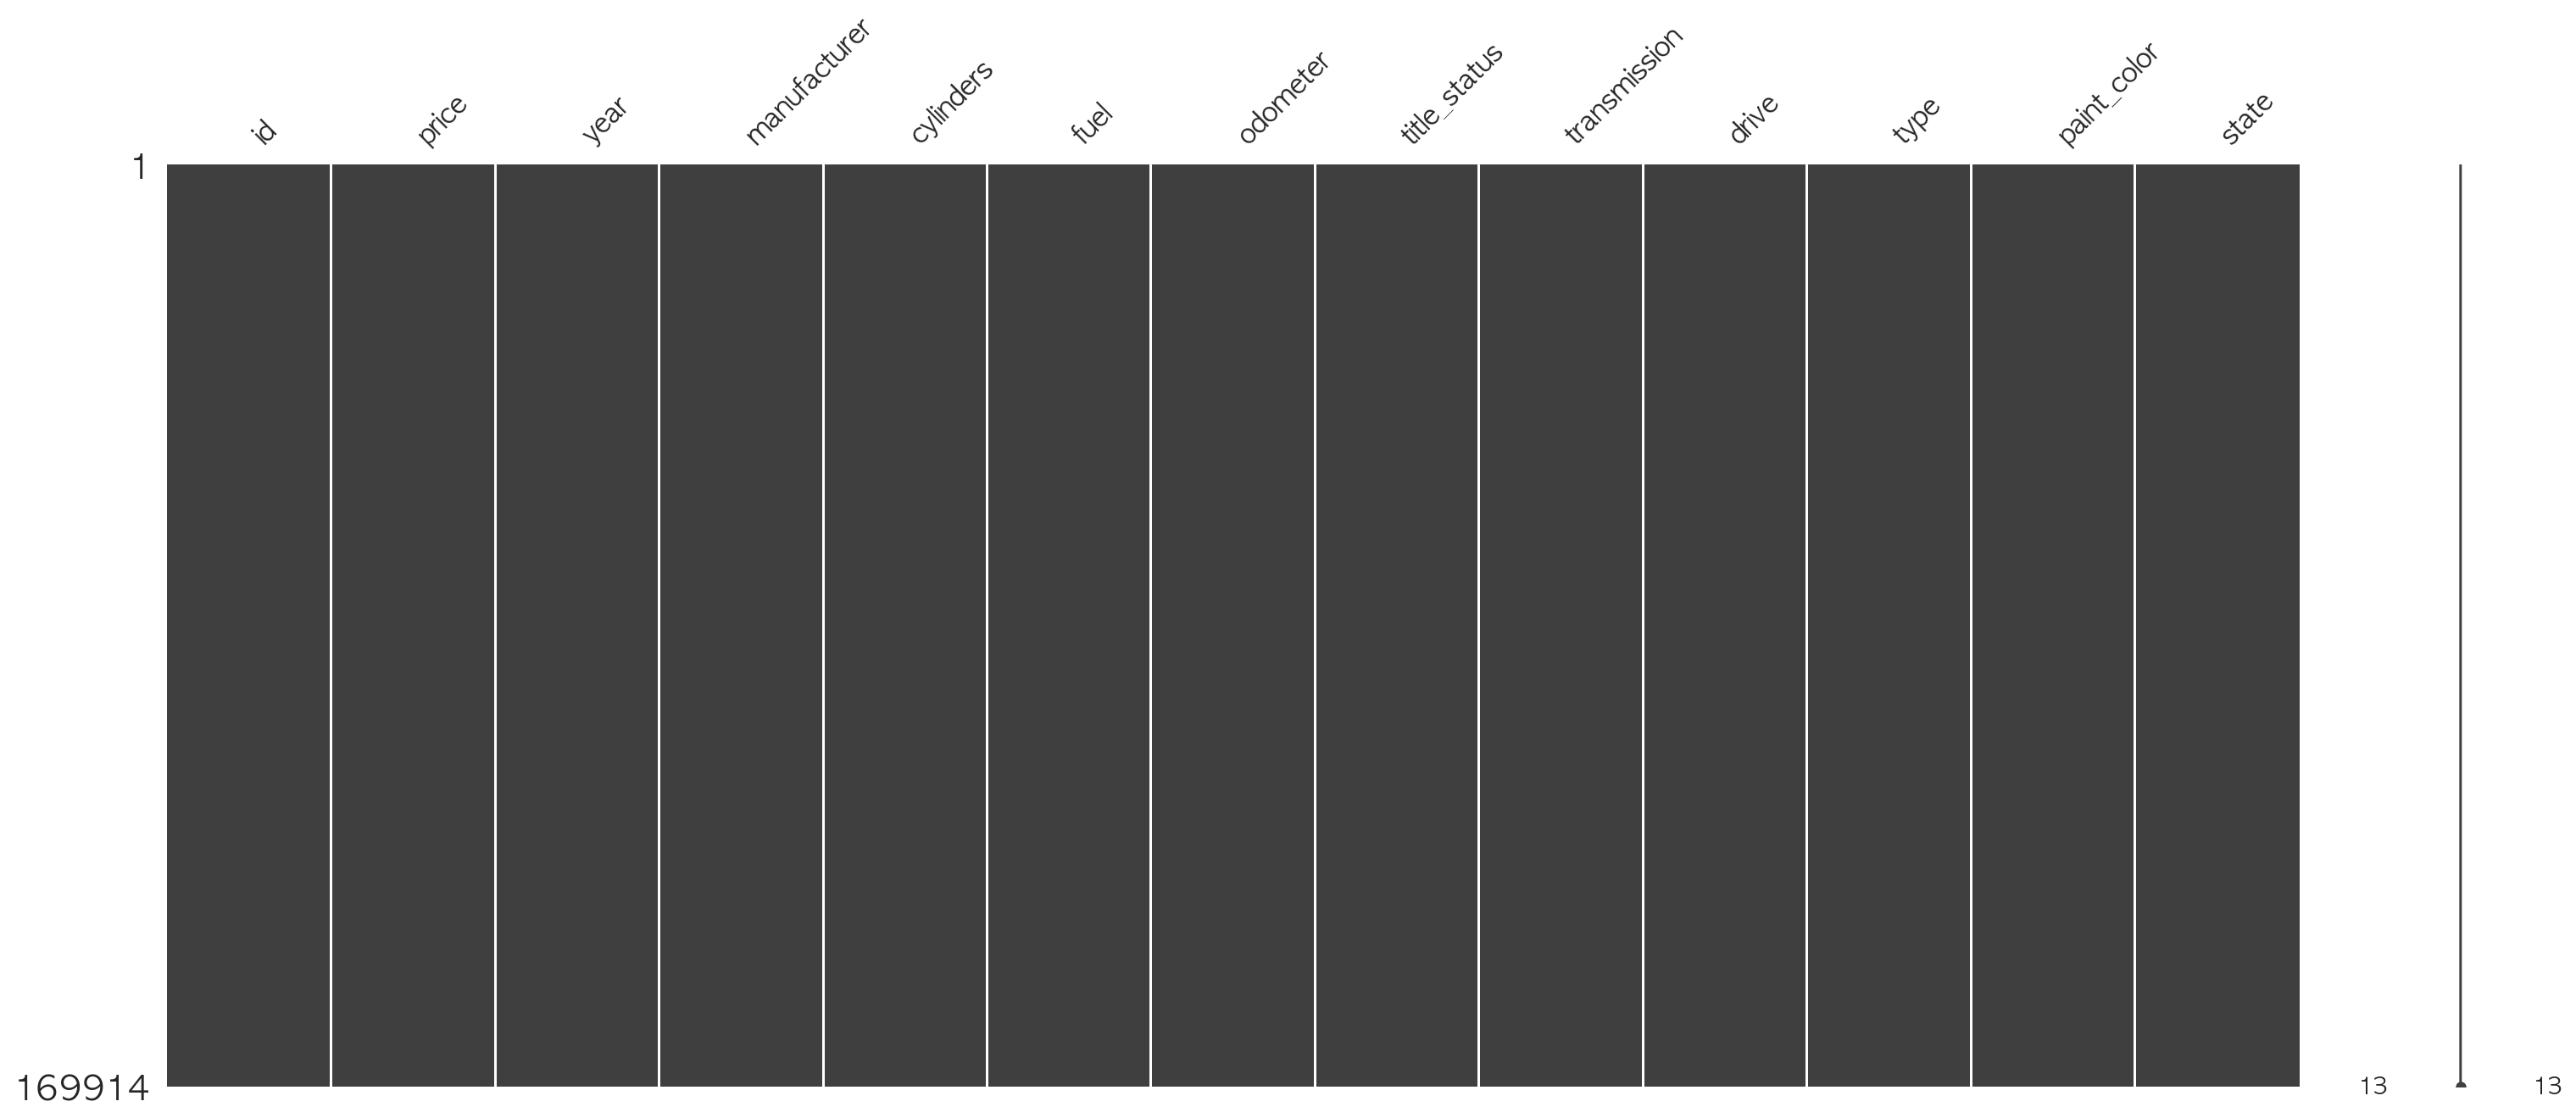

In [226]:
msno.matrix(raw_data)
plt.show()

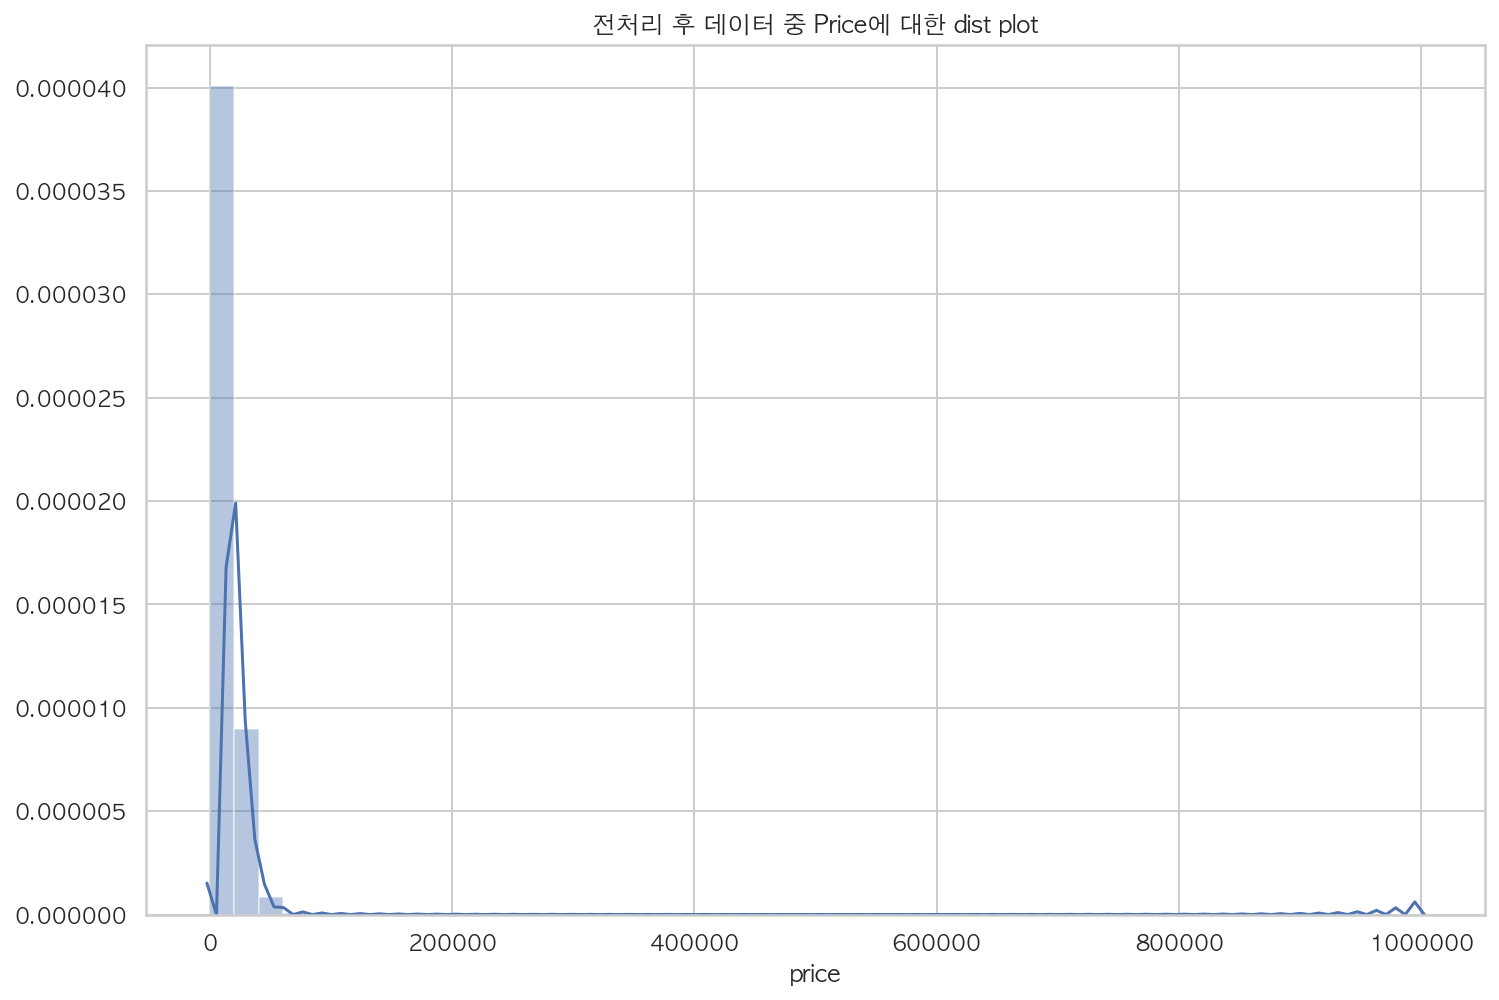

In [227]:
# price dist plot
plt.figure(figsize=(12,8))
sns.distplot(raw_data['price'], kde=True)
plt.title('전처리 후 데이터 중 Price에 대한 dist plot')
plt.show()

#### 결측치 제거한 데이터의 OLS 분석

In [228]:
# 실수 OLS 분석: 가격, 연도(카테고리, 범주형 독립변수), 풀랭크 방식
# 결정계수 : 0.368, 회귀적 유용성 보통
# 연식 데이터가 숫자이므로 연속값으로 인식하지 않도록 C() 연산자를 사용
model = sm.OLS.from_formula("price ~ C(year) + 0", data=raw_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     999.0
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:17:01   Log-Likelihood:            -1.7885e+06
No. Observations:              169914   AIC:                         3.577e+06
Df Residuals:                  169821   BIC:                         3.578e+06
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(year)[1917.0]    1.2e+04   9019.509     

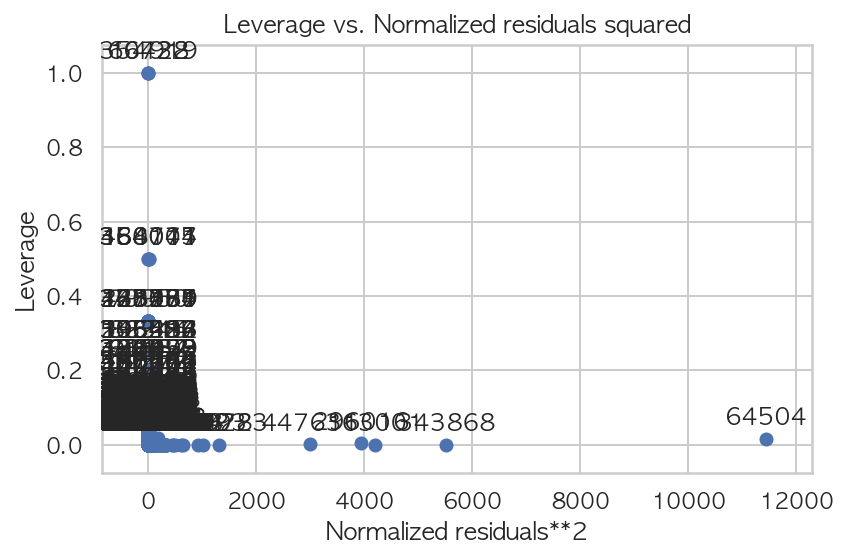

In [233]:
# cook's distance, price & year
# x축: 표준화 잔차의 제곱, y축: 레버리지 값
# plt.figure(figsize=(12,8))
sm.graphics.plot_leverage_resid2(result)
plt.tight_layout()
plt.show()

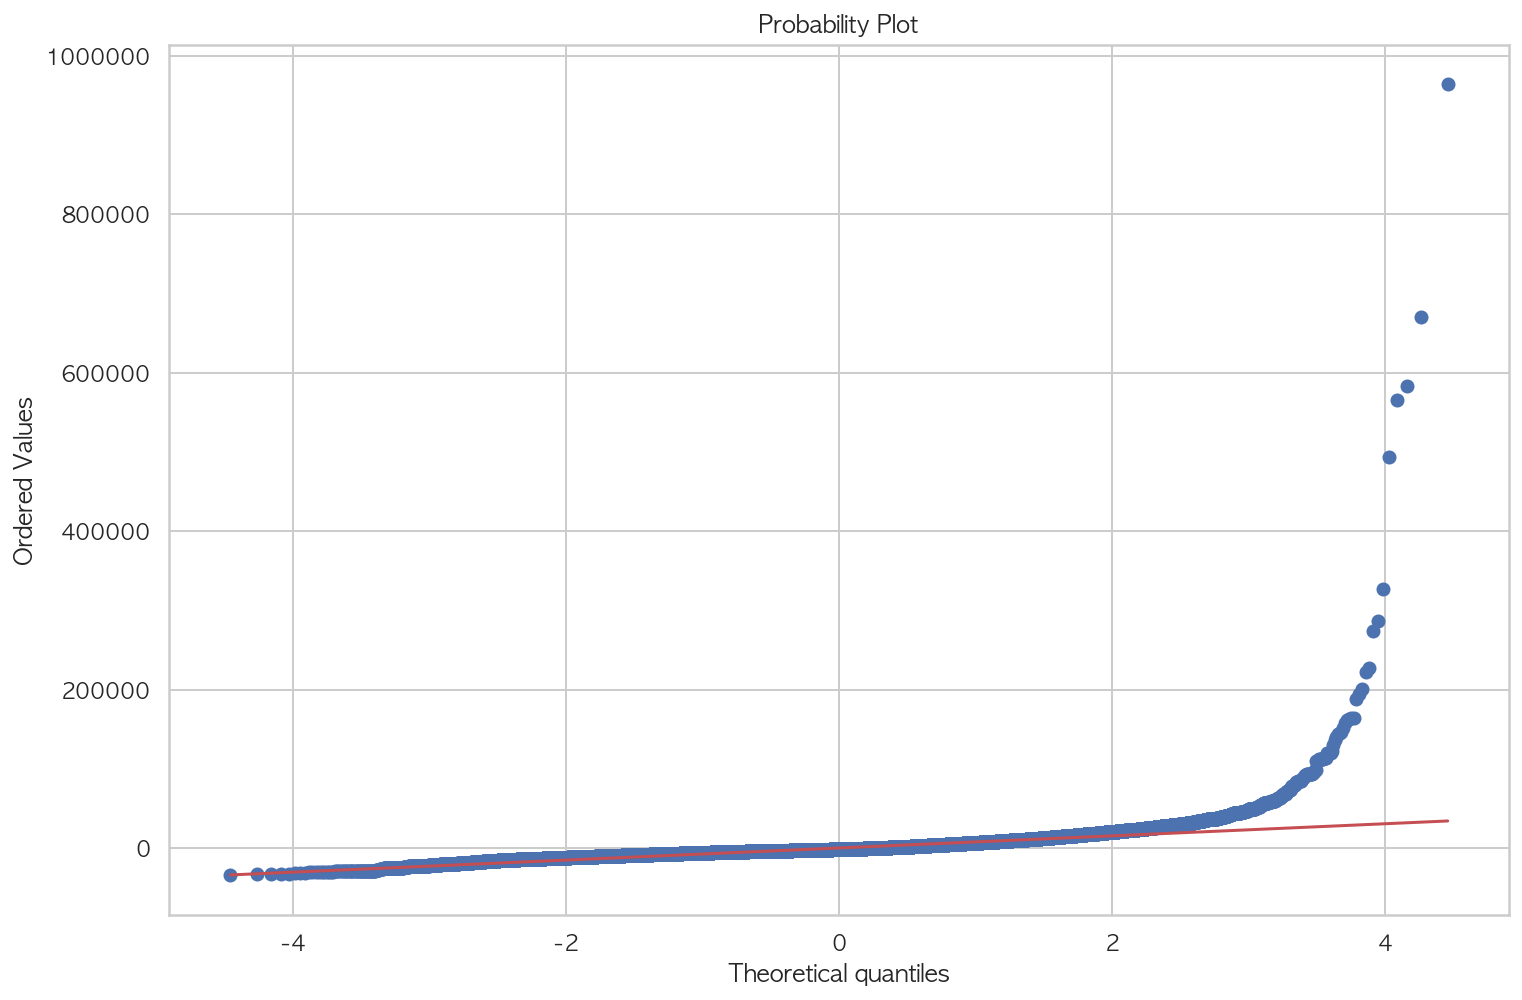

In [231]:
# QQ 플롯: 가격 & 연도
plt.figure(figsize=(12,8))
sp.stats.probplot(result.resid, plot=plt)
plt.show()

In [56]:
# 실수 OLS 분석: 가격, 주행거리
# 결정계수 : 0.078, 회귀적 유용성 낮음
model = sm.OLS.from_formula("price ~ odometer + 0", data=raw_data)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.175
Model:                            OLS   Adj. R-squared (uncentered):              0.175
Method:                 Least Squares   F-statistic:                          3.642e+04
Date:                Tue, 24 Mar 2020   Prob (F-statistic):                        0.00
Time:                        13:24:58   Log-Likelihood:                     -1.8982e+06
No. Observations:              171410   AIC:                                  3.796e+06
Df Residuals:                  171409   BIC:                                  3.796e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

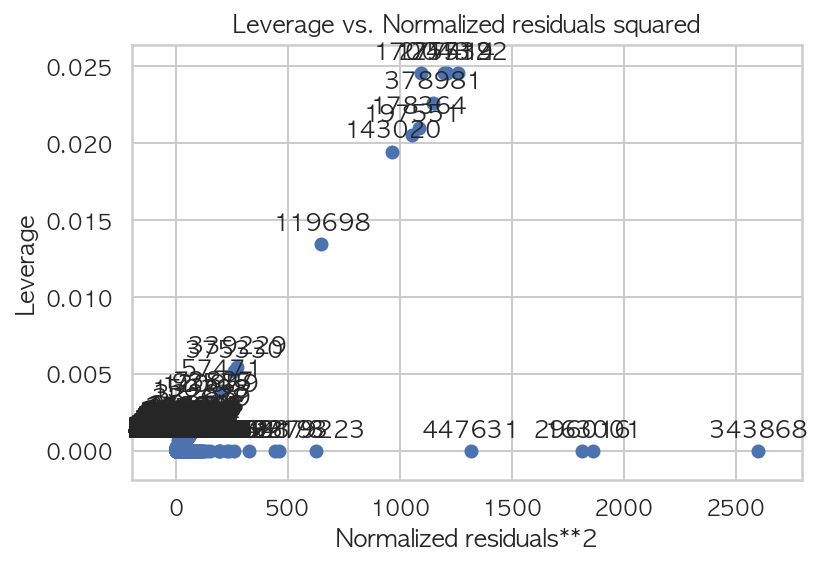

In [57]:
# cook's distance, price & odometer
# x축: 표준화 잔차의 제곱, y축: 레버리지 값
plt.figure(figsize=(12,8))
sm.graphics.plot_leverage_resid2(result)
plt.show()

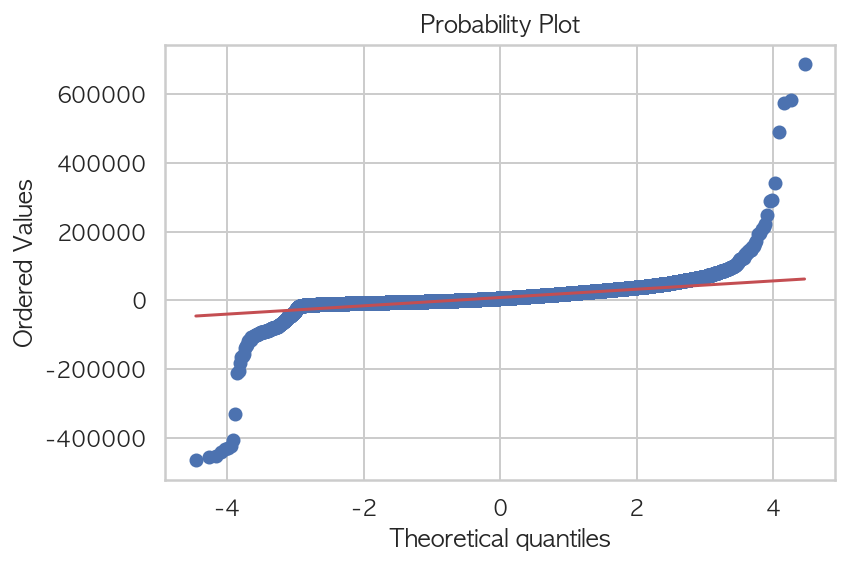

In [58]:
# QQ플롯: 가격 & 주행거리
plt.figure(figsize=(12,8))
sp.stats.probplot(result.resid, plot=plt)
plt.show()

In [54]:
# 모든 독립변수와 종속변수의 OLS 분석, 풀랭크 방식
model = sm.OLS.from_formula("price ~ year + manufacturer + cylinders + fuel + odometer \
+ title_status + transmission + drive + type + paint_color + state + 0", data=raw_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     1099.
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:23:25   Log-Likelihood:            -1.7837e+06
No. Observations:              171410   AIC:                         3.568e+06
Df Residuals:                  171272   BIC:                         3.569e+06
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
manufacturer[a

In [79]:
# 실수 표준편차 확인
raw_data.describe().loc['std']

id         4919160.25
price        10966.50
year             7.29
odometer    108824.48
Name: std, dtype: float64

In [80]:
raw_data.describe()

,id,price,year,odometer
count,171410.00,171410.00,171410.00,171410.00
mean,7044139743.75,13219.42,2009.74,109091.25
std,4919160.25,10966.50,7.29,108824.48
min,7032558378.00,100.00,1915.00,0.00
25%,7040753697.25,5500.00,2006.00,60000.00
50%,7045292310.50,10250.00,2011.00,102799.00
75%,7048505688.50,17995.75,2015.00,146430.50
max,7050101998.00,690000.00,2021.00,10000000.00


In [45]:
# 스케일링
model = sm.OLS.from_formula("scale(price) ~ C(year) + C(manufacturer) \
+ C(cylinders) + C(fuel) + scale(odometer) + C(title_status) + C(transmission) \
+ C(drive) + C(type) + C(paint_color) + C(state)", data=raw_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           scale(price)   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     1298.
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:59:48   Log-Likelihood:            -1.5623e+05
No. Observations:              171410   AIC:                         3.129e+05
Df Residuals:                  171177   BIC:                         3.153e+05
Df Model:                         232                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [ ]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.axhline(0.02, c="g", ls="--")
plt.title("각 데이터의 레버리지 값")
plt.show()

In [49]:
plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.axhline(0.02, c="g", ls="--")
plt.title("각 데이터의 레버리지 값")
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x115eb0cb0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# QQ플롯
sp.stats.probplot(result2.resid, plot=plt)
plt.show()

In [47]:
# 모든 독립변수 항에 state 카테고리를 곱함
# model = sm.OLS.from_formula("scale(price) ~ C(year) + scale(odometer) + C(state) * C(drive) \
# + C(state) * C(fuel) + C(state) * C(manufacturer) + C(state) * C(cylinders) \
# + C(state) * C(title_status) + C(state) * C(transmission) + C(state) * C(type) \
# + C(state) * C(paint_color)", raw_data)
# result = model.fit()
# print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           scale(price)   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     86.09
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:09:34   Log-Likelihood:            -1.4971e+05
No. Observations:              171410   AIC:                         3.071e+05
Df Residuals:                  167560   BIC:                         3.458e+05
Df Model:                        3849                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

#### 전처리 데이터 
1. 종속변수 price 제거내용
 - 가격이 $0인 데이터 
 - 가격이 $100 이하인 데이터 
 - 가격이 $100만 이상인 데이터 
 - 가격이 1~9까지 중복된 데이터
 - 가격이 1~9까지 연속된 데이터


2. 독립변수 year 제거내용
 - 2000년 이전 데이터 
 - 2019년 이후 데이터

In [ ]:
# 1. price = 0 인 데이터 수 : 43579개 제거
price_0 = raw_data[raw_data['price'] == 0].index
raw_data.drop(price_0, inplace=True)

# price < 100 인 데이터 수 : 4268개 제거
price_under_100 = raw_data[raw_data['price'] < 100].index
raw_data.drop(price_under_100, inplace=True)

# price $100만 이상의 갯수 : 72개 제거
price_over_100m = raw_data[raw_data['price'] >= 1000000].index
raw_data.drop(price_over_100m, inplace=True)

# 1 ~ 9까지 중복된 숫자 제거하기 : 2523개 제거
price_duple = raw_data[raw_data['price']
                       .isin([1, 11, 111, 1111, 11111, 111111, 1111111, 11111111, 111111111, 
                              2, 22, 222, 2222, 22222, 222222, 2222222, 22222222, 222222222, 
                              3, 33, 333, 3333, 33333, 333333, 3333333, 33333333, 333333333, 
                              4, 44, 444, 4444, 44444, 444444, 4444444, 44444444, 444444444, 
                              5, 55, 555, 5555, 55555, 555555, 5555555, 55555555, 555555555, 
                              6, 66, 666, 6666, 66666, 666666, 6666666, 66666666, 666666666, 
                              7, 77, 777, 7777, 77777, 777777, 7777777, 77777777, 777777777, 
                              8, 88, 888, 8888, 88888, 888888, 8888888, 88888888, 888888888, 
                              9, 99, 999, 9999, 99999, 999999, 9999999, 99999999, 999999999])].index
raw_data.drop(price_duple, inplace=True)

# 1 ~ 9까지 연속된 숫자 제거하기 : 215개 제거
price_iter = raw_data[raw_data['price']
                      .isin([12, 123, 1234, 12345, 123456, 1234567, 12345678, 123456789, 1234567890, 
                             23, 234, 2345, 23456, 234567, 2345678, 23456789, 234567890, 
                             34, 345, 3456, 34567, 345678, 3456789, 34567890, 
                             45, 456, 4567, 45678, 456789, 4567890, 
                             56, 567, 5678, 56789, 567890, 
                             67, 678, 6789, 67890, 
                             78, 789, 7890, 
                             89, 890, 
                             90, 
                             98, 987, 9876, 98765, 987654, 9876543, 98765432, 987654321, 9876543210, 
                             87, 876, 8765, 87654, 876543, 8765432, 87654321, 876543210, 
                             76, 765, 7654, 76543, 765432, 7654321, 76543210, 
                             65, 654, 6543, 65432, 654321, 6543210, 
                             54, 543, 5432, 54321, 543210, 
                             43, 432, 4321, 43210, 
                             32, 321, 3210, 
                             21, 210])].index
raw_data.drop(price_iter, inplace=True)

# 연도 0값, 2000년 이하, 2020년, 2021년 데이터 제거: 130개
year_0 = raw_data[raw_data['year'] == 0].index # 0개
raw_data.drop(year_0, inplace=True)
year_2020 = raw_data[raw_data['year'] == 2020].index # 130개
raw_data.drop(year_2020, inplace=True)
year_2021 = raw_data[raw_data['year'] == 2021].index # 0개
raw_data.drop(year_2021, inplace=True)